In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("new_unicorn_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation
0,0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0
1,1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0
2,2,Stripe,2014-01-23,Fintech,United States,San Francisco,North America,2010,$2B,95,"Khosla Ventures, LowercaseCapital, capitalG",95.0,"Khosla Ventures, LowercaseCapital, capitalG",4,95.0
3,3,Klarna,2011-12-12,Fintech,Sweden,Stockholm,Europe,2005,$4B,46,"Institutional Venture Partners, Sequoia Capita...",6.7,"Institutional Venture Partners, Sequoia Capita...",6,6.7
4,4,Canva,2018-01-08,Internet Software And Services,Australia,Surry Hills,Oceania,2012,$572M,40,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40.0


In [4]:
# df[df["Company"] == "ByteDance"]

In [5]:
df['Industry']

0                                   Other
1       E-commerce And Direct-to-consumer
2                                 Fintech
3                                 Fintech
4          Internet Software And Services
                      ...                
1034    E-commerce And Direct-to-consumer
1035    E-commerce And Direct-to-consumer
1036                  Consumer And Retail
1037                              Fintech
1038    E-commerce And Direct-to-consumer
Name: Industry, Length: 1039, dtype: object

In [6]:
le = LabelEncoder()
df['Encoded_Industry'] = le.fit_transform(df['Industry'])
original_values = le.inverse_transform(df['Encoded_Industry'])

# Mapping dictionary
mapping_dict = dict(zip(df['Encoded_Industry'].unique(), le.inverse_transform(df['Encoded_Industry'].unique())))
sorted_mapping_dict = sorted(mapping_dict.items(), key=lambda x: x[0])

for key, value in sorted_mapping_dict:
    print(f"{key} = {value}")

0 = Artificial Intelligence
1 = Auto And Transportation
2 = Consumer And Retail
3 = Cybersecurity
4 = Data Management And Analytics
5 = E-commerce And Direct-to-consumer
6 = Edtech
7 = Fintech
8 = Hardware
9 = Health
10 = Internet Software And Services
11 = Mobile And Telecommunications
12 = Other
13 = Supply Chain, Logistics, And Delivery
14 = Travel


In [7]:
X = df['Encoded_Industry']
X

0       12
1        5
2        7
3        7
4       10
        ..
1034     5
1035     5
1036     2
1037     7
1038     5
Name: Encoded_Industry, Length: 1039, dtype: int64

In [8]:
Y = df['Years to Unicorn']
Y

0       10
1       10
2        4
3        6
4        6
        ..
1034     5
1035     2
1036     3
1037    16
1038     6
Name: Years to Unicorn, Length: 1039, dtype: int64

In [9]:
df[df['Years to Unicorn'] > 15]
# df[df["Company"] == "ByteDance"]

,Unnamed: 0,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation,Encoded_Industry
10,10,Epic Games,2018-10-26,Other,United States,Cary,North America,1991,$7B,32,"Tencent Holdings, KKR, Smash Ventures",31.50,"Tencent Holdings, KKR, Smash Ventures",27,31.50,12
34,34,GoodLeap,2021-10-13,Internet Software And Services,United States,Roseville,North America,2003,$800M,12,"New Enterprise Associates, BDT Capital Partner...",12.00,"New Enterprise Associates, BDT Capital Partner...",18,12.00,10
40,40,Global Switch,2016-12-22,Hardware,United Kingdom,London,Europe,1998,$5B,11,"Aviation Industry Corporation of China, Essenc...",11.10,"Aviation Industry Corporation of China, Essenc...",18,11.10,8
45,45,OutSystems,2018-06-05,Internet Software And Services,United States,Boston,North America,2001,$572M,10,"KKR, ES Ventures, North Bridge Growth Equity",9.50,"KKR, ES Ventures, North Bridge Growth Equity",17,9.50,10
74,74,Caris Life Sciences,2021-05-12,Health,United States,Irving,North America,1996,$1B,8,"Sixth Street Partners, OrbiMed Advisors, Highl...",7.83,"Sixth Street Partners, OrbiMed Advisors, Highl...",25,7.83,9
79,79,National Stock Exchange of India,2020-07-01,Fintech,India,Mumbai,Asia,1998,$297M,7,"TA Associates, SoftBank Group, GS Growth",6.50,"TA Associates, SoftBank Group, GS Growth",22,6.50,7
92,92,1Password,2021-07-08,Cybersecurity,Canada,Toronto,North America,2005,$920M,7,"Slack Fund, Accel, Skip Capital",6.80,"Slack Fund, Accel, Skip Capital",16,6.80,3
98,98,Easyhome,2018-02-12,Consumer And Retail,China,Beijing,Asia,1999,$2B,6,"Alibaba Group, Boyu Capital, Borui Capital",5.78,"Alibaba Group, Boyu Capital, Borui Capital",19,5.78,2
103,103,Mollie,2020-09-08,Fintech,Netherlands,Amsterdam,Europe,2004,$928M,6,Technology Crossover Ventures,6.50,Technology Crossover Ventures,16,6.50,7
111,111,Vice Media,2011-04-02,Internet Software And Services,United States,Brooklyn,North America,1994,$1B,6,"Technology Crossover Ventures, A&E Television ...",5.70,"Technology Crossover Ventures, A&E Television ...",17,5.70,10


In [10]:
# Reshape X and Y to a 2D array
X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# classifier=DecisionTreeClassifier()
# classifier.fit(X_train,Y_train)
# Y_pred=classifier.predict(Y_test)
# accuracy_score(Y_test,Y_pred)

In [13]:
# mse = mean_squared_error(Y_test, Y_pred)
# print(f'Mean Squared Error: {mse}')

In [14]:
# # Visualize the decision tree

# plt.figure(figsize=(18, 12))
# plot_tree(classifier, filled=True, rounded=True)
# plt.show()

In [15]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [16]:
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 18.20504334960721


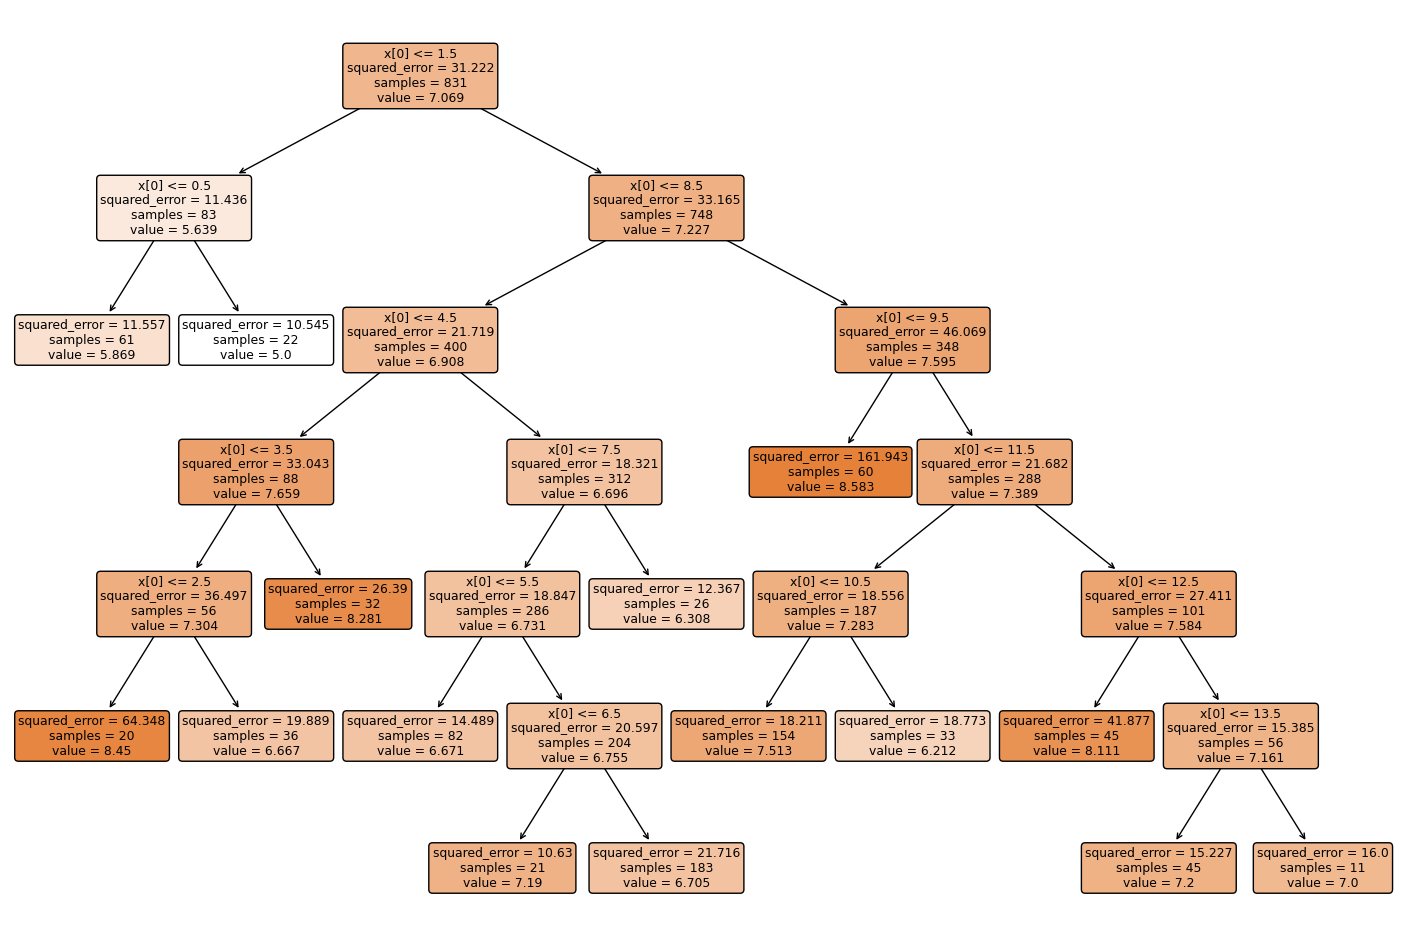

In [17]:
# Visualize the decision tree

plt.figure(figsize=(18, 12))
plot_tree(regressor, filled=True, rounded=True)
plt.show()